# Pendahuluan

Dari dataset yang ada :

1. result01, data mengenai jumlah perjalanan dan nama perusahaan taksi pada tanggal 15-16 November 2017.

2. result04, data mengenai jumlah rata-rata perjalanan yang berakhir di wilayah Chicago pada bulan November 2017.

3. result07, data merupakan informasi semua perjalanan yang dilakukan pada hari sabtu bulan November 2017 yang dimulai di Loop dan berakhir di O'Hare.

Akan diolah untuk mendapatkan informasi yang ada.

Dan akan dilakukan pengujian hipotesis untuk menjawab pertanyaan yang diajukan, apakah durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan ?
 

# Inisialisasi

In [1]:
# memuat library
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
# Fungsi menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Memuat data

In [3]:
#Memuat data

try :
    result01 = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 6\File\moved_project_sql_result_01.csv')
    result04 = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 6\File\moved_project_sql_result_04.csv')
    result07 = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 6\File\moved_project_sql_result_07.csv')

except :
    result01 = pd.read_csv('/datasets/project_sql_result_01.csv')
    result04 = pd.read_csv('/datasets/project_sql_result_04.csv')
    result07 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Mempersiapkan dan memperbaiki data

Untuk mempermudah melihat informasi dan mengidentifikasi masalah yang terdapat pada data, dibuatkan fungsi karena akan dilakukan secara berulang.

In [4]:
# Fungsi informasi data

def info(file) :
    nacheck = file.isna().sum().sum()
    dupcheck = file.duplicated().sum()
    print('jumlah baris dan kolom :', file.shape)
    print()
    print(file.info())
    print()
    print(file.describe())
    print()
    if dupcheck > 0 :
        print('Terdapat duplikat eksplisit :', dupcheck, 'Baris')
    else :
        print('Tidak terdapat duplikat eksplisit')
    print()
    if nacheck > 0 :
        print('Terdapat nilai yang hilang pada :')
        print(file.isna().sum())
    else :
        print('Tidak terdapat nilai yang hilang')
    

## result01

### Informasi umum

In [5]:
info(result01)

jumlah baris dan kolom : (64, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Tidak terdapat duplikat eksplisit

Tidak terdapat nilai yang hilang


In [6]:
result01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Informasi yang terdapat pada kolomnya :

`company_name`: nama perusahaan taksi.

`trips_amount`: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

## result04

### Informasi umum

In [7]:
info(result04)

jumlah baris dan kolom : (94, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Tidak terdapat duplikat eksplisit

Tidak terdapat nilai yang hilang


In [8]:
result04.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Informasi yang terdapat dalam kolomnya :

`dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir.

`average_trips`: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

## result07

### Informasi umum

In [9]:
info(result07)

jumlah baris dan kolom : (1068, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

Terdapat duplikat eksplisit : 197 Baris

Tidak terdapat nilai yang hilang


In [10]:
result07.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
result07['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Data merupakan informasi semua perjalanan yang dilakukan pada hari sabtu yang dimulai di Loop dan berakhir di O'Hare. Dengan kondisi cuaca yang dibagi menjadi 2 kategori :

1. *Bad* cuaca hujan dan badai.

2. *Good* cuaca cerah.

Informasi yang terdapat pada kolomnya :

`start_ts` — tanggal dan waktu penjemputan.

`weather_conditions` — kondisi cuaca saat perjalanan dimulai.

`duration_seconds` — durasi perjalanan dalam satuan detik.

Masalah yang terdapat pada data result07 :

1. `start_ts` mempunyai format object.
2. Terdapat duplikat eksplisit sebanyak 197 baris.
3. Terdapat `duration_seconds` dengan durasi 0 detik.

### Memperbaiki data

#### Memperbaiki format `start_ts`

In [12]:
result07['start_ts'] = pd.to_datetime(result07['start_ts'],format='%Y-%m-%d %H:%M:%S' )

In [13]:
# Cek perubahan data
result07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Data dalam kolom `start_ts` dirubah menjadi format datetime yang sebelumnya memiliki format object.

#### Menghapus duplikat eksplisit

In [14]:
result07 = result07.drop_duplicates()

In [15]:
# Cek baris duplikat
result07.duplicated().sum()

0

Data sudah tidak memiliki duplikat eksplisit setelah duplikat eksplisit dihapus.

#### Menghapus data `duration_seconds` dengan durasi 0 detik

In [16]:
# Cek data dengan durasi 0 detik
result07.query('duration_seconds == 0')

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [17]:
# Filter data tanpa durasi 0 detik
result07 = result07.query('duration_seconds != 0')

In [18]:
# Cek jumlah baris data dengan durasi 0 detik
result07.query('duration_seconds == 0')['start_ts'].count()

0

Data pada kolom `duration_seconds` sebanyak 6 baris dengan durasi 0 detik dihapus karena akan mempengaruhi nilai rata-rata durasi perjalanan.

#### Ringkasan perbaikan

In [19]:
result07.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB


Perbaikan yang dilakukan pada data result07 :

1. `start_ts` dirubah menjadi format datetime.

2. Menghapus duplikat eksplisit sebanyak 197 baris.

3. Menghapus data `duration_seconds` dengan durasi 0 detik.



# Eksplorasi data

## Perusahaan taksi dengan jumlah perjalanan tertinggi

In [20]:
# Top 10 perusahaan taksi dengan jumlah perjalanan tertinggi
top10_taxi = result01.sort_values('trips_amount', ascending = False).head(10)
top10_taxi

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<Axes: xlabel='company_name'>

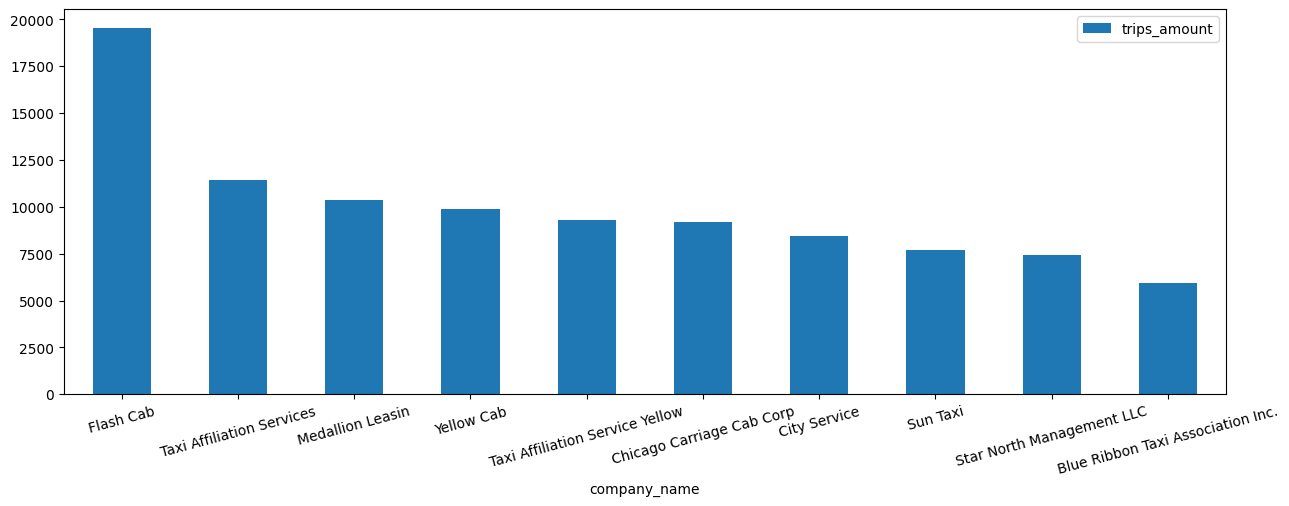

In [21]:
# Grafik batang
top10_taxi.set_index('company_name').plot(kind='bar', figsize=(15,5), rot=15)

3 perusahaan taksi dengan jumlah perjalanan tertinggi yaitu, Flash Cab, Taxi Affiliation Services dan Medallion Leasin.

## Wilayah titik pengantaran tertinggi

In [22]:
# 10 Wilayah titik pengantaran tertinggi
top10_dropoff = result04.sort_values('average_trips', ascending = False).head(10)
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<Axes: xlabel='dropoff_location_name'>

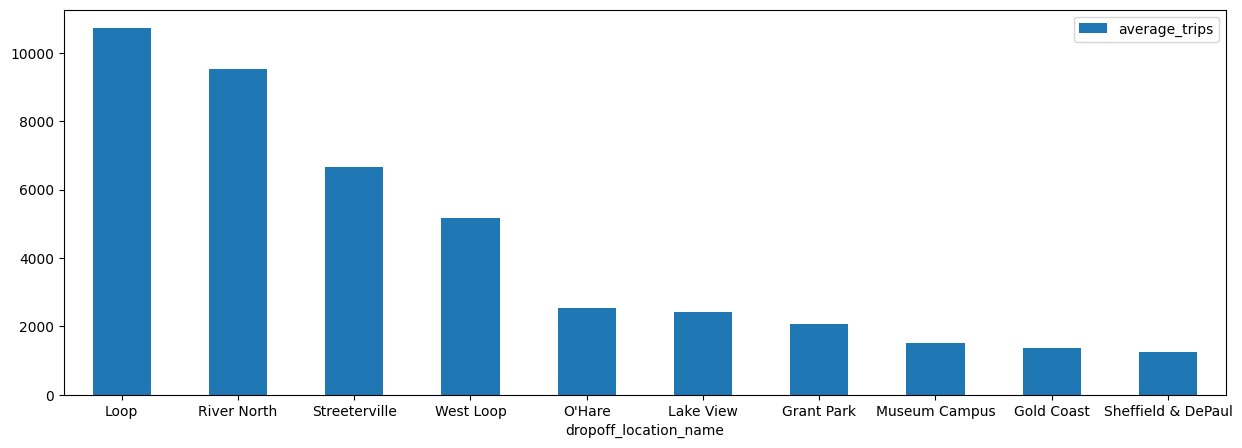

In [23]:
# Grafik batang
top10_dropoff.set_index('dropoff_location_name').plot(kind='bar', figsize=(15,5), rot=0)

3 wilayah titik pengantaran tertinggi yaitu : Loop, River North dan Streeterville.

# Pengujian hipotesis

Apakah durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan ?

H0 = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari Sabtu yang cerah sama dengan Sabtu yang hujan.

Ha = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari Sabtu yang cerah tidak sama dengan Sabtu yang hujan.

In [24]:
# Filter data dan varians
bad_weather = result07.query('weather_conditions == "Bad"').groupby('start_ts')['duration_seconds'].mean()
good_weather = result07.query('weather_conditions == "Good"').groupby('start_ts')['duration_seconds'].mean()
print('Varians bad_weather :', np.var(bad_weather))
print('Varians good_weather :', np.var(good_weather))

Varians bad_weather : 592537.9385865615
Varians good_weather : 328261.9811548303


In [25]:
# Uji hipotesis
result = st.ttest_ind(bad_weather, good_weather, equal_var=False)

# Pengujian hipotesis
alpha = 0.05

print('p-value:', result.pvalue)

if result.pvalue < alpha : 
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 0.43867419746507197
Kita tidak dapat menolak hipotesis nol


Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari Sabtu yang cerah sama dengan Sabtu yang hujan.

# Kesimpulan

Terdapat 3 dataset :

1. result01, data mengenai jumlah perjalanan dan nama perusahaan taksi pada tanggal 15-16 November 2017.

    informasi yang terdapat pada kolomnya :

    `company_name`: nama perusahaan taksi.

    `trips_amount`: jumlah perjalanan.

2. result04, data mengenai jumlah rata-rata perjalanan yang berakhir di wilayah Chicago pada bulan November 2017. 

    Informasi yang terdapat dalam kolomnya :

    `dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir.

    `average_trips`: jumlah rata-rata perjalanan.

3. result07, data merupakan informasi semua perjalanan yang dilakukan pada hari sabtu bulan November 2017 yang dimulai di Loop dan berakhir di O'Hare. Dengan kondisi cuaca yang dibagi menjadi 2 kategori :

    1. *Bad* cuaca hujan dan badai.

    2. *Good* cuaca cerah.

    Informasi yang terdapat pada kolomnya :

    `start_ts` — tanggal dan waktu penjemputan.

    `weather_conditions` — kondisi cuaca saat perjalanan dimulai.

    `duration_seconds` — durasi perjalanan dalam satuan detik.

Perbaikan yang dilakukan pada data result07 :

1. `start_ts` dirubah menjadi format datetime.

2. Menghapus duplikat eksplisit sebanyak 197 baris.

3. Menghapus data `duration_seconds` dengan durasi 0 detik.

Dari dataset result01 didapatkan informasi Top 10 perusahaan taksi dengan jumlah perjalanan tertinggi :


In [26]:
top10_taxi

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Dengan 3 perusahaan tertinggi yaitu : Flash Cab, Taxi Affiliation Services dan Medallion Leasin.


Dari dataset resul04 didapatkan informasi Top 10 wilayah titik pengantaran tertinggi di Chicago :

In [27]:
round(top10_dropoff,1)

,dropoff_location_name,average_trips
0,Loop,10727.5
1,River North,9523.7
2,Streeterville,6664.7
3,West Loop,5163.7
4,O'Hare,2546.9
5,Lake View,2421.0
6,Grant Park,2068.5
7,Museum Campus,1510.0
8,Gold Coast,1364.2
9,Sheffield & DePaul,1259.8


Dengan 3 wilayah tertinggi : Loop, River North dan Streeterville.

Dari dataset result07 dilakukan pengujian hipotesis yang menunjukkan bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari Sabtu yang cerah sama dengan Sabtu yang hujan.